In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pickle

from diffms import ROOT


mol_path = ROOT / "examples" / "test"

with (open(mol_path / "true.pkl", "rb")) as openfile:
    true_mols = pickle.load(openfile)

with open(mol_path / "pred.pkl", "rb") as openfile:
    predicted_mols = pickle.load(openfile)

In [24]:
import numpy as np
from rdkit.Chem import DataStructs
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.rdchem import Mol

from diffms.utils import tanimoto_sim

def mol_to_fingerprint(m: Mol, radius: int = 3, nbits: int = 2048):
    morgan_gen = rdFingerprintGenerator.GetMorganGenerator(
        radius=radius,
        fpSize=nbits
    )

    curr_fp = morgan_gen.GetFingerprint(m)

    fingerprint = np.zeros((0,), dtype=np.uint8)
    DataStructs.ConvertToNumpyArray(curr_fp, fingerprint)
    
    return fingerprint

def tanimoto_sim_mol(mol1: Mol, mol2: Mol):
    fp1 = mol_to_fingerprint(mol1)
    fp2 = mol_to_fingerprint(mol2)

    return tanimoto_sim(fp1, fp2)

[18:13:19] Explicit valence for atom # 3 P, 6, is greater than permitted
[18:13:19] Explicit valence for atom # 5 O, 3, is greater than permitted
[18:13:19] Explicit valence for atom # 11 N, 4, is greater than permitted
[18:13:19] non-ring atom 7 marked aromatic
[18:13:19] Explicit valence for atom # 11 N, 4, is greater than permitted


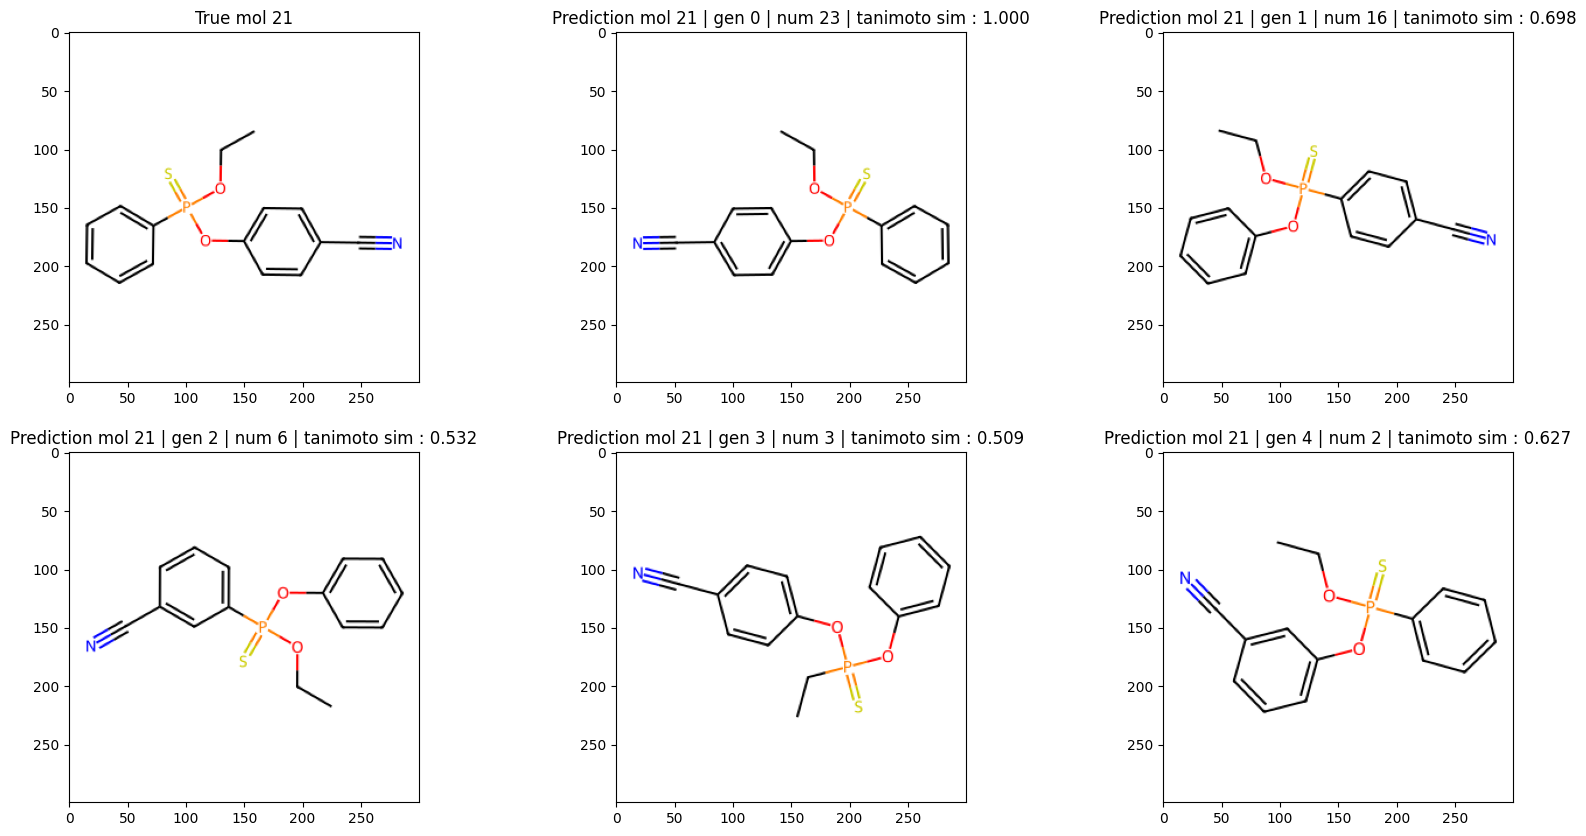

In [ ]:
import random
from collections import Counter

import matplotlib.pyplot as plt
from rdkit.Chem import Draw, MolFromSmiles

from diffms.utils import is_valid, mol2smiles

idx = 21

tm = true_mols[idx]
preds = [p for p in predicted_mols[idx] if is_valid(p)]
c = Counter([mol2smiles(p) for p in preds])

top_smiles = [(MolFromSmiles(s), num) for s, num in c.most_common(5)]

tm_img = Draw.MolToImage(tm)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0][0].imshow(tm_img)
ax[0][0].set_title(f"True mol {idx}")


for i, (pm, num) in enumerate(top_smiles):
    pm_img = Draw.MolToImage(pm)
    t_sim = tanimoto_sim_mol(tm, pm)

    ax[(i+1)//3][(i+1)%3].imshow(pm_img)
    ax[(i+1)//3][(i+1)%3].set_title(f"Prediction mol {idx} | gen {i} | num {num} | tanimoto sim : {t_sim:.3f}")

plt.show()

[18:14:26] Explicit valence for atom # 51 C, 5, is greater than permitted
[18:14:26] Explicit valence for atom # 22 C, 5, is greater than permitted
[18:14:26] Explicit valence for atom # 43 O, 3, is greater than permitted
[18:14:26] Explicit valence for atom # 6 C, 5, is greater than permitted


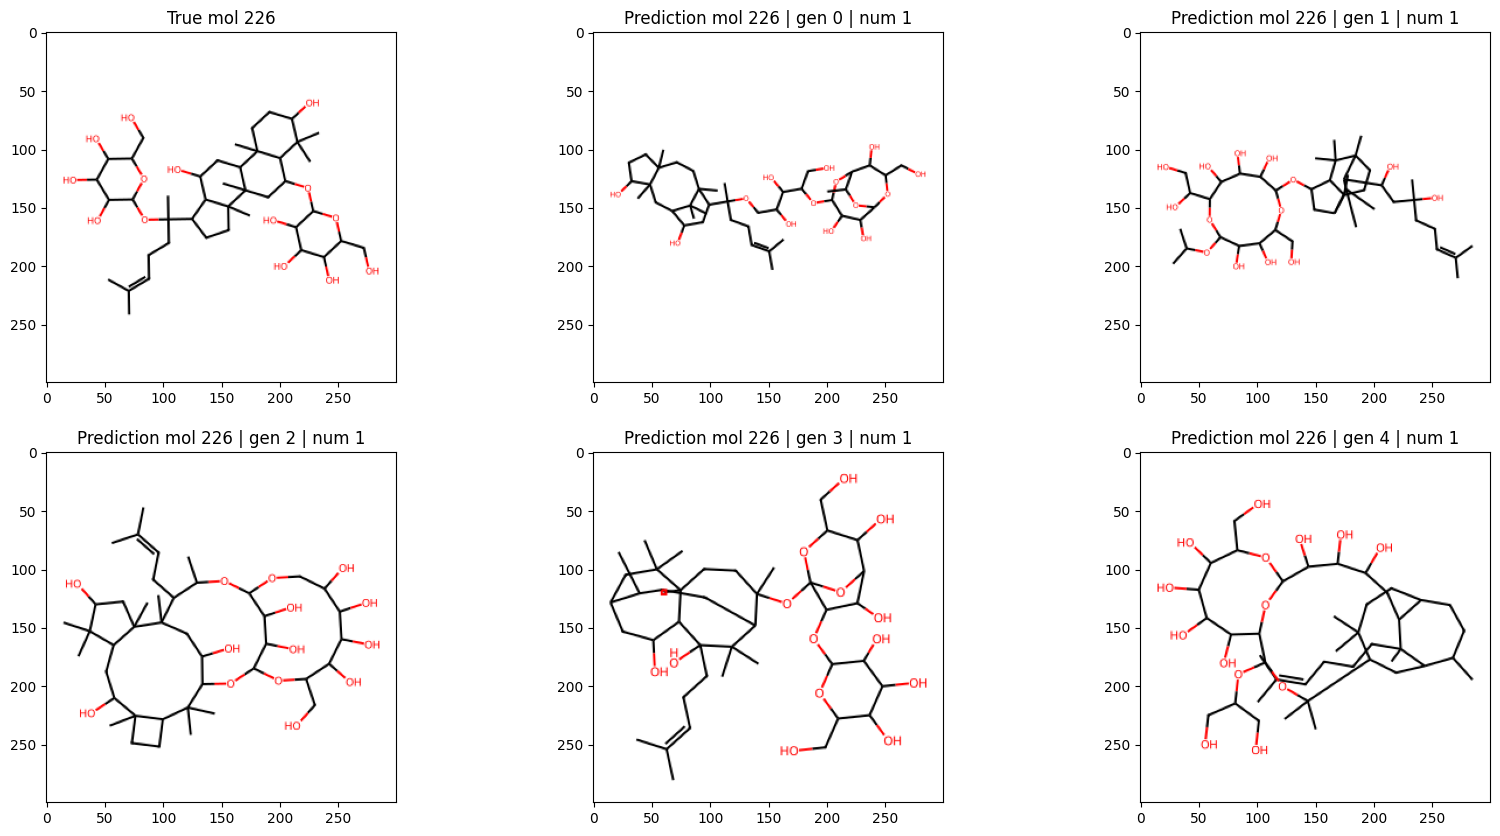

In [27]:
import random
from collections import Counter

import matplotlib.pyplot as plt
from rdkit.Chem import Draw, MolFromSmiles

from diffms.utils import is_valid, mol2smiles

idx = random.choice(range(len(true_mols)))

tm = true_mols[idx]
preds = [p for p in predicted_mols[idx] if is_valid(p)]
c = Counter([mol2smiles(p) for p in preds])

top_smiles = [(MolFromSmiles(s), num) for s, num in c.most_common(5)]

tm_img = Draw.MolToImage(tm)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0][0].imshow(tm_img)
ax[0][0].set_title(f"True mol {idx}")


for i, (pm, num) in enumerate(top_smiles):
    pm_img = Draw.MolToImage(pm)

    ax[(i+1)//3][(i+1)%3].imshow(pm_img)
    ax[(i+1)//3][(i+1)%3].set_title(f"Prediction mol {idx} | gen {i} | num {num}")

plt.show()